In [36]:
!pip install pca
from pca import pca
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **PCA - Train**

In [86]:
train = pd.read_csv('/content/drive/MyDrive/dataset/train_data.csv')
train

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


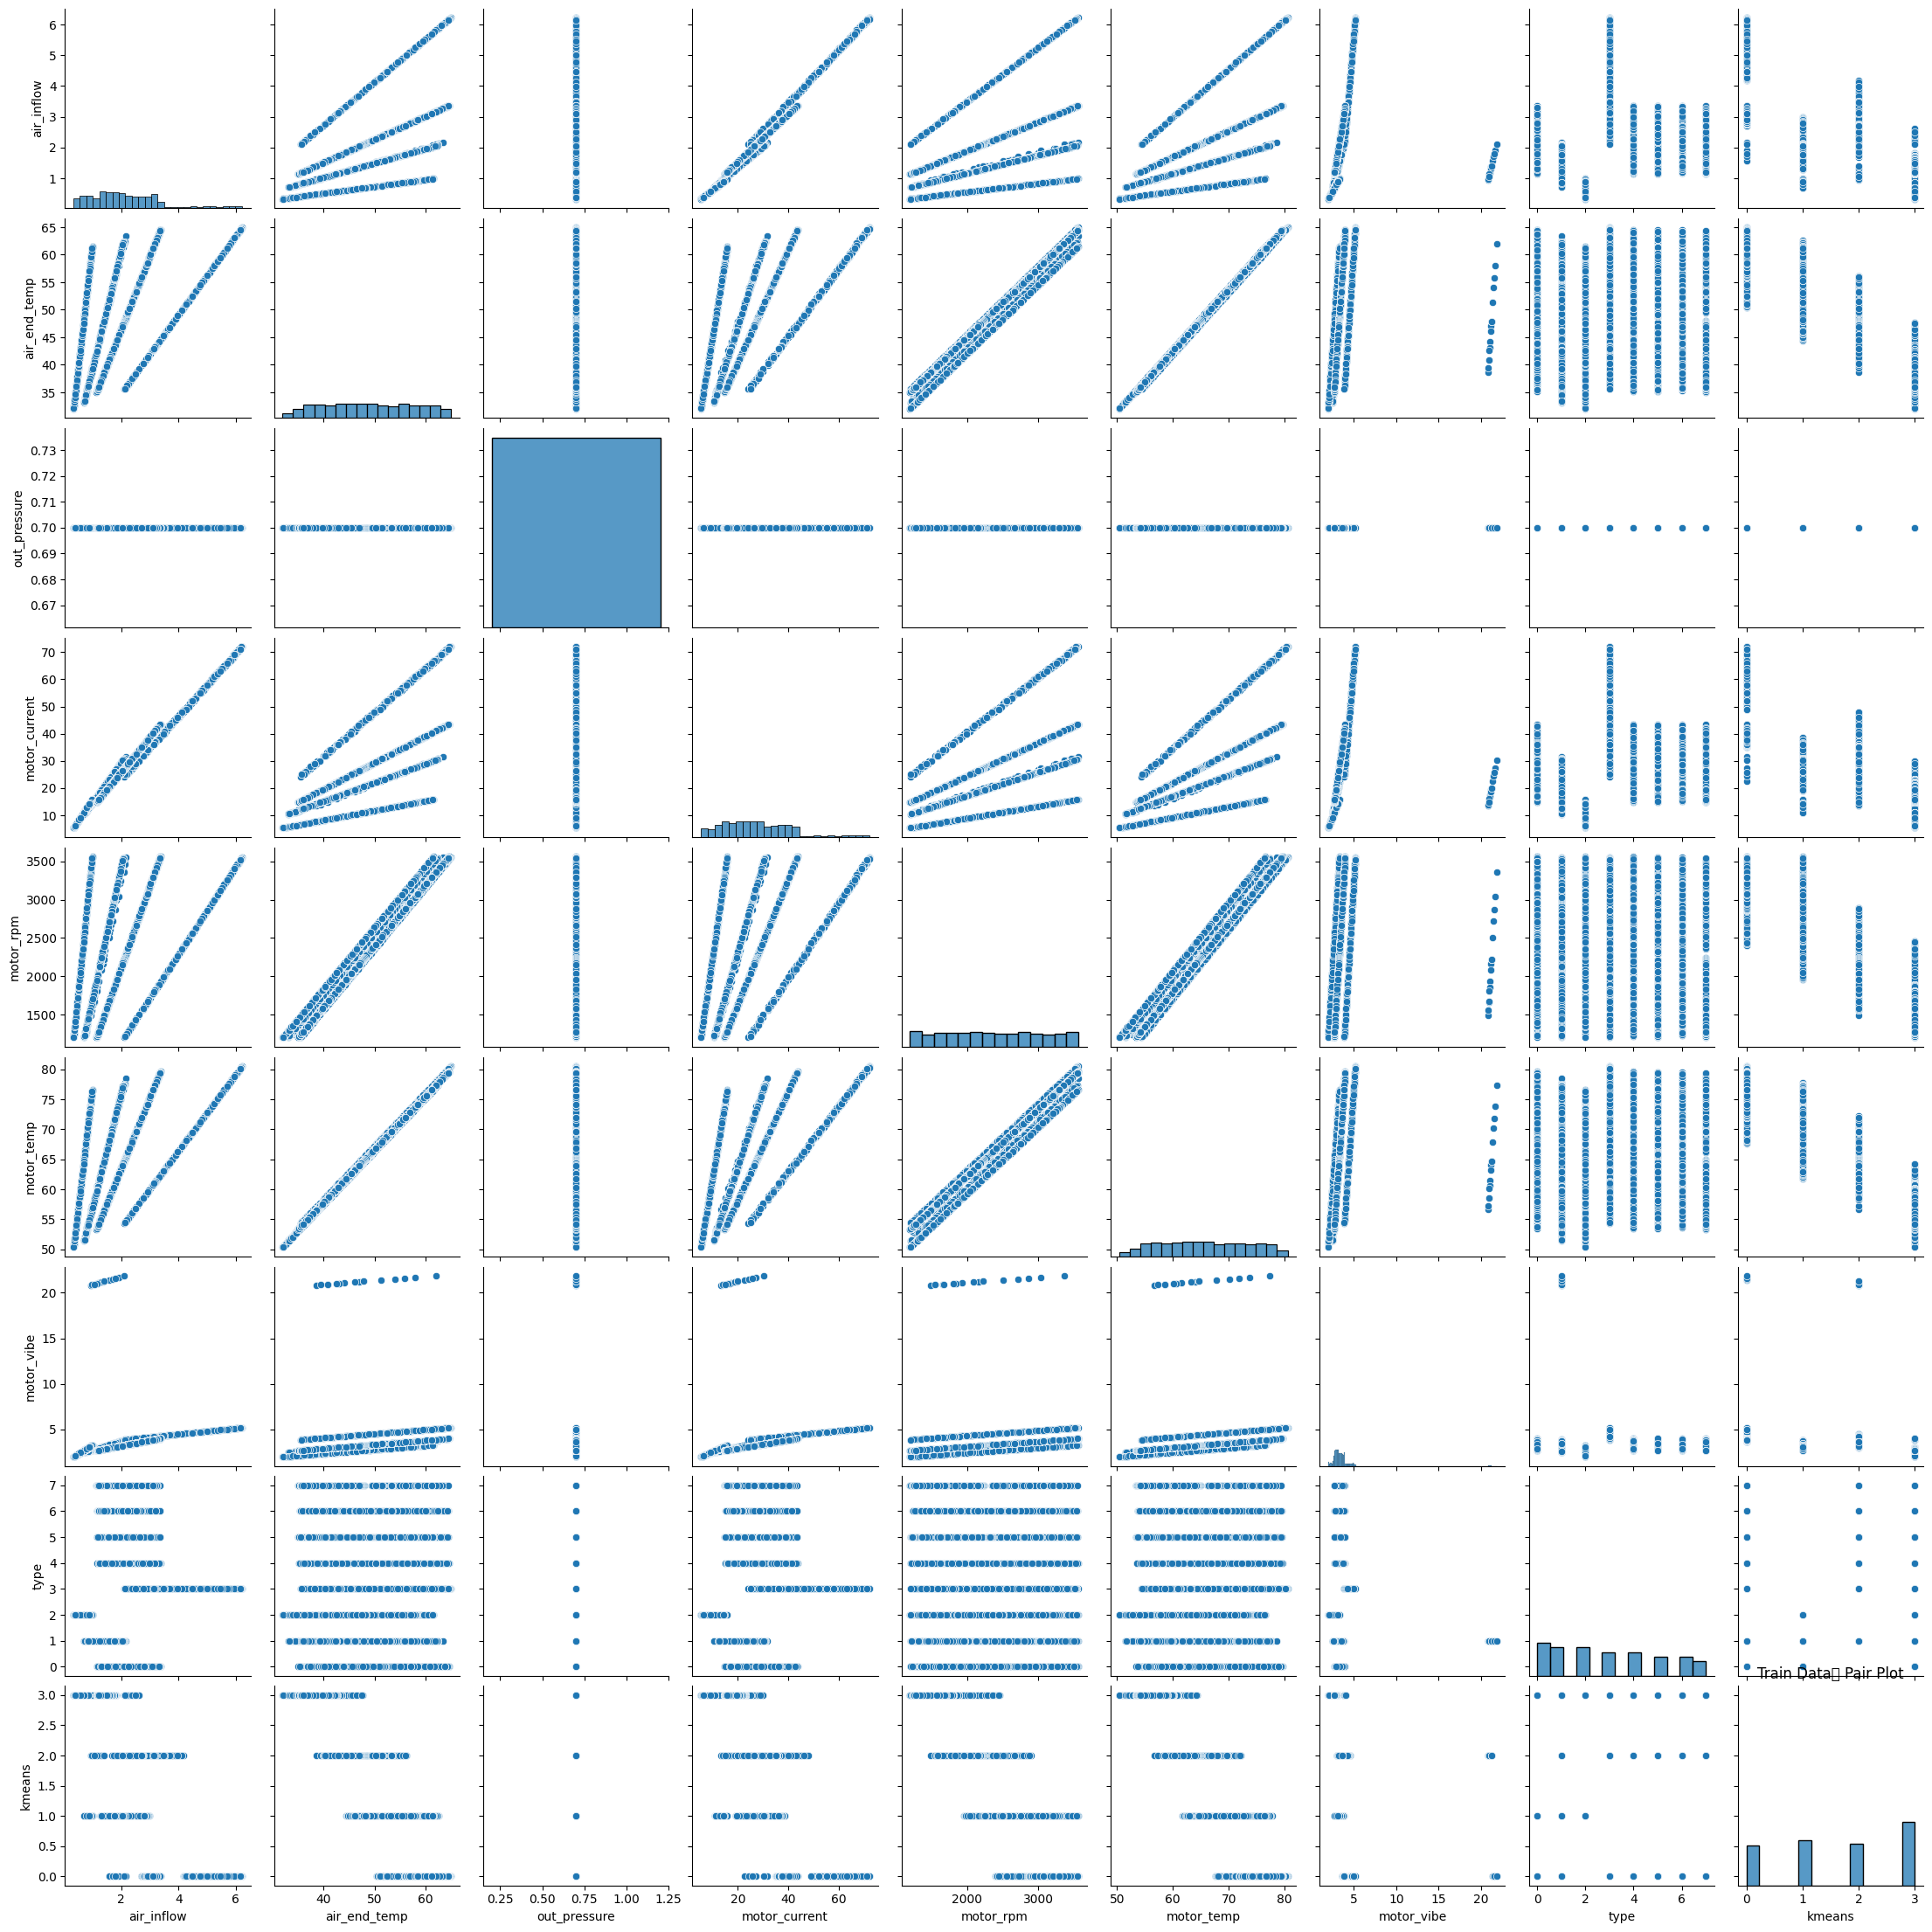

In [125]:
sns.pairplot(train)
plt.title("Train Data의 Pair Plot")
plt.show()

In [87]:
train_columns = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type']

train = pd.DataFrame(train, columns=train_columns)
train.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [88]:
train_scaled = StandardScaler().fit_transform(train)
train_pca = PCA(n_components=2)
train_pca.fit(train_scaled)
train_pca = train_pca.transform(train_scaled)
print(train_pca.shape)

(2463, 2)


In [91]:
train_pca_columns = ['pca_component_1', 'pca_component_2']
pca_train = pd.DataFrame(train_pca, columns=train_pca_columns)
pca_train

,pca_component_1,pca_component_2
0,-1.809240,-0.747678
1,2.166630,-1.395636
2,-0.877725,-0.900724
3,0.436667,-1.113738
4,-0.895751,-0.898928
...,...,...
2458,0.343131,1.473153
2459,-0.363571,1.590867
2460,-2.800951,1.986914
2461,-2.744542,1.977543


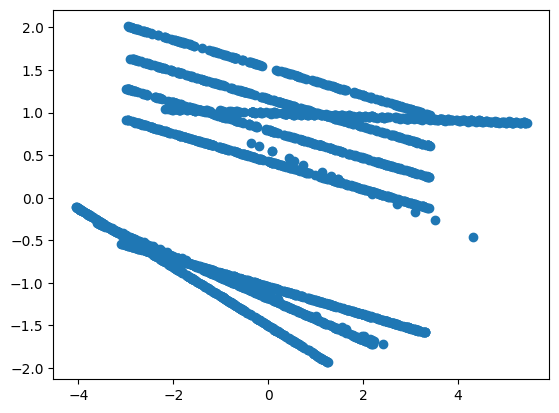

In [92]:
plt.scatter(pca_train['pca_component_1'],pca_train['pca_component_2'])

# **PCA - Test**

In [93]:
test = pd.read_csv('/content/drive/MyDrive/dataset/test_data.csv')
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


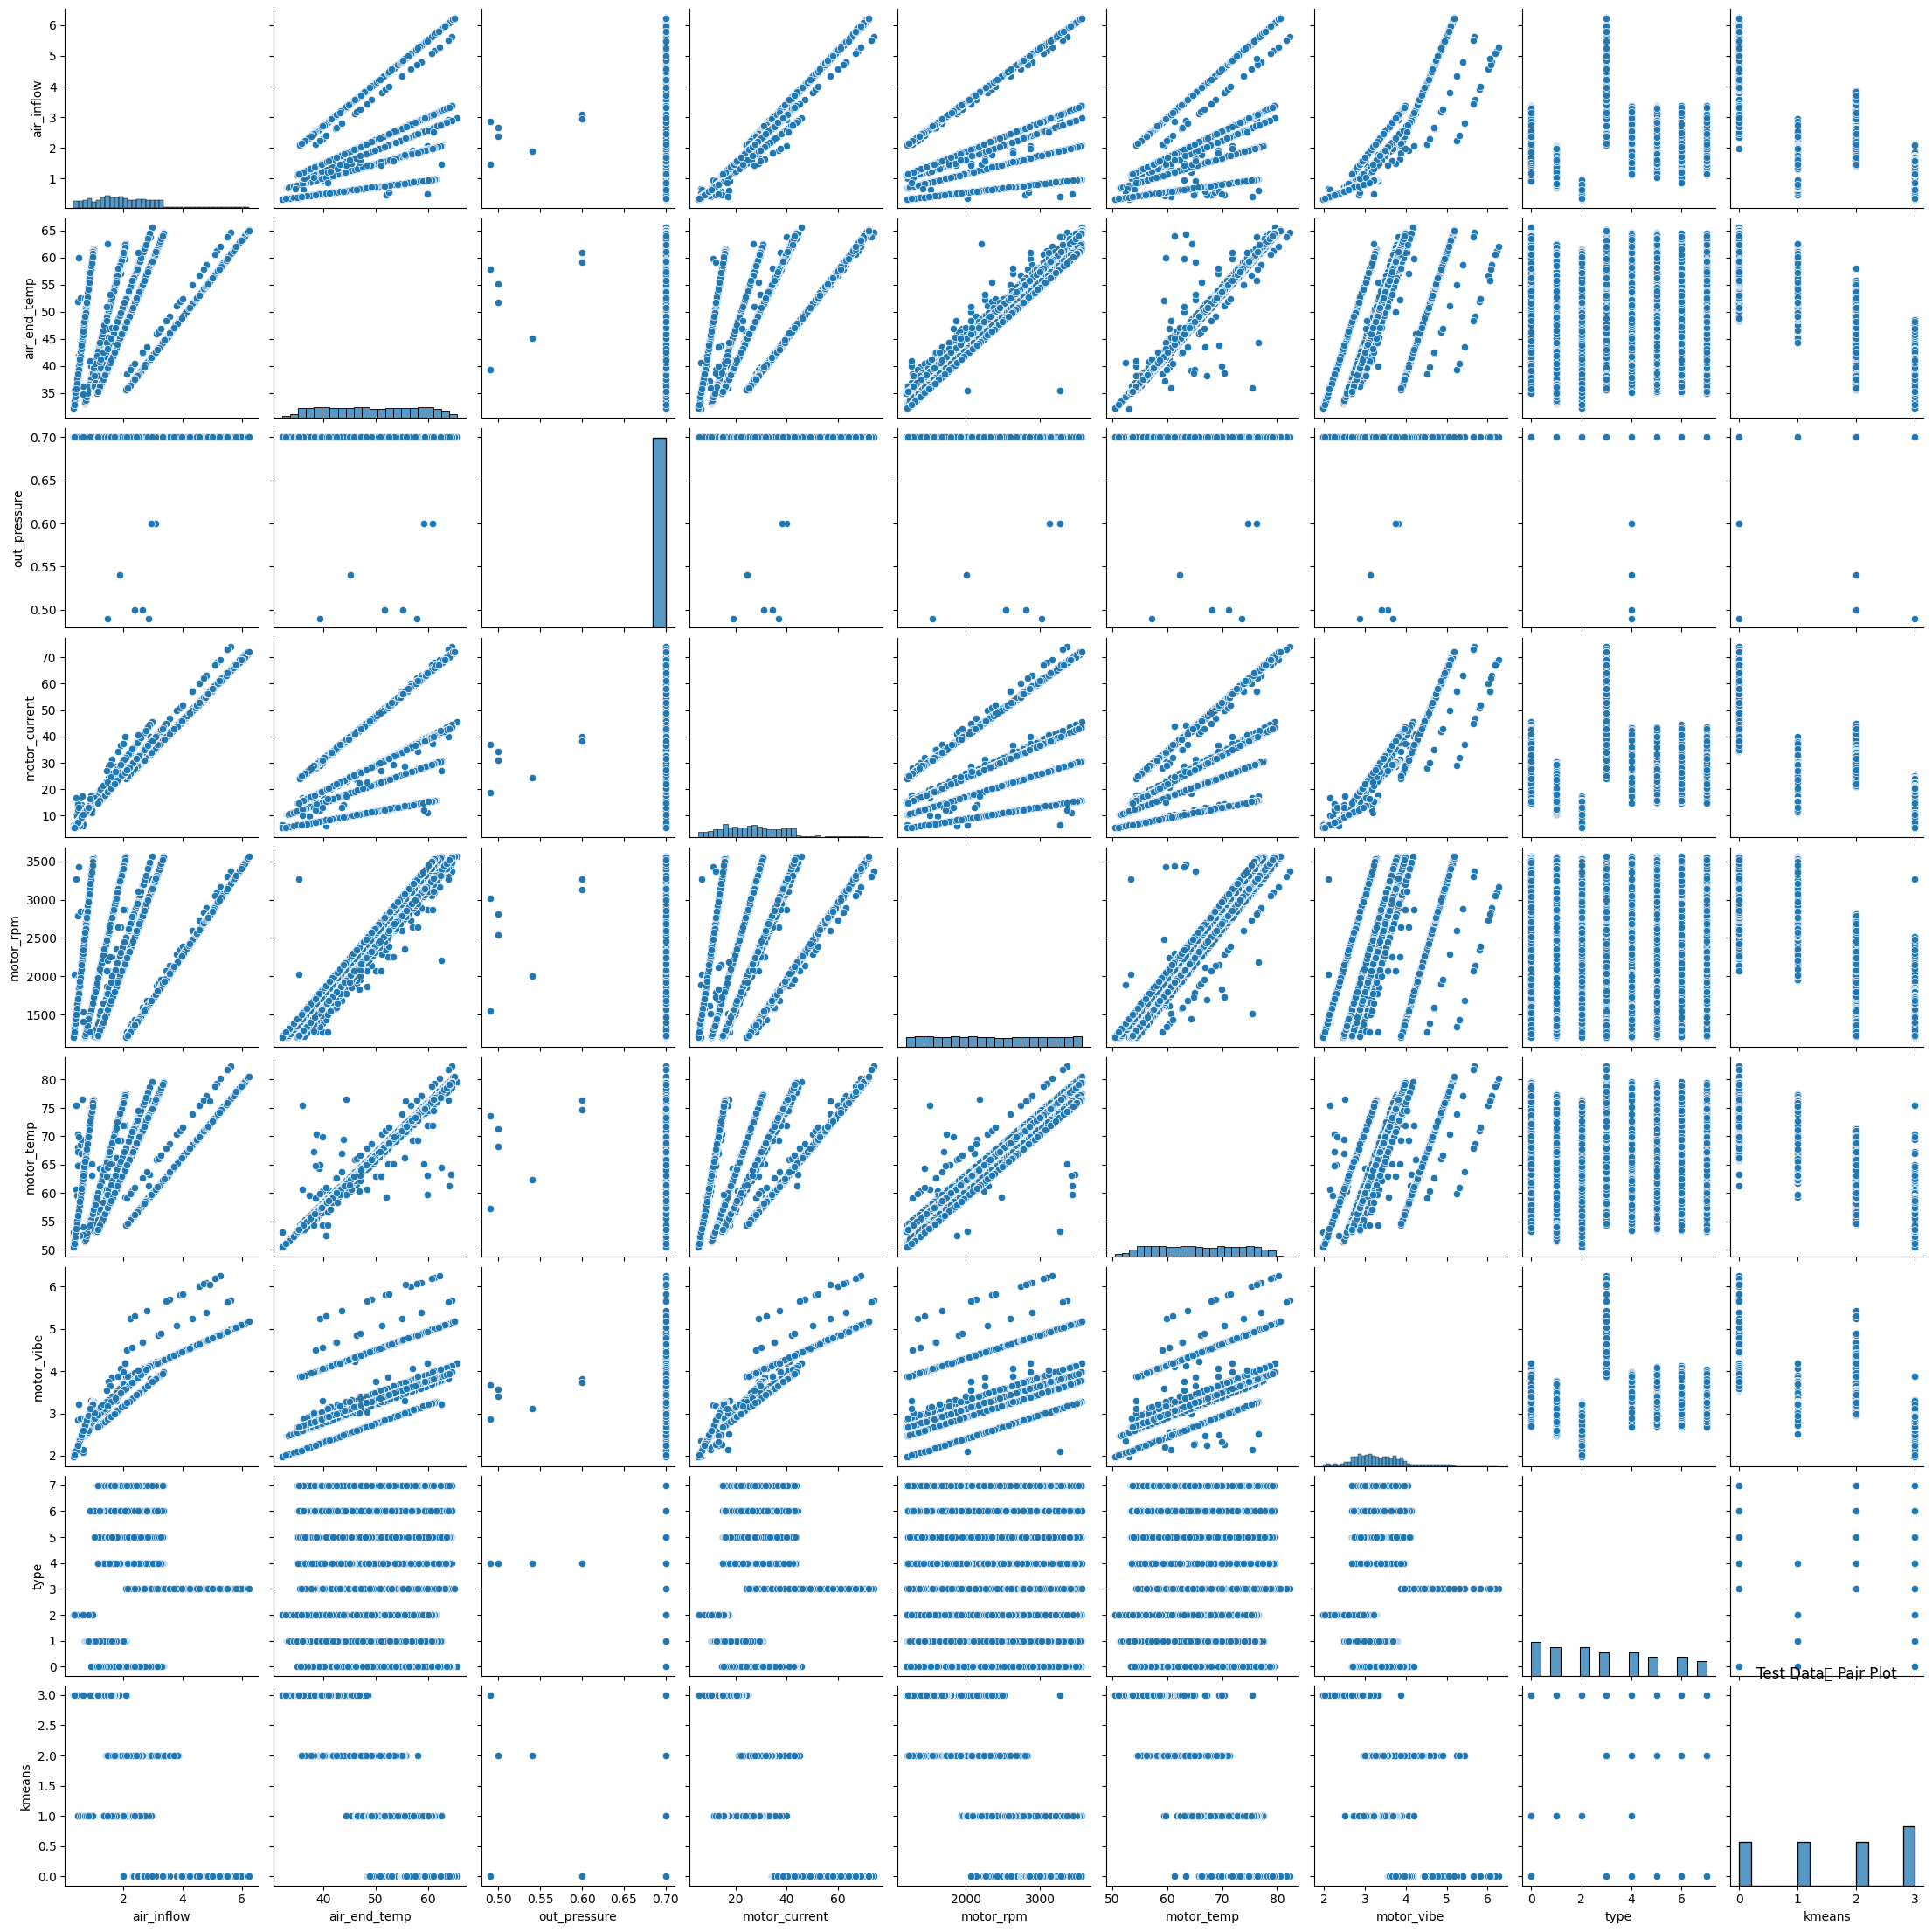

In [126]:
sns.pairplot(test)
plt.title("Test Data의 Pair Plot")
plt.show()

In [94]:
test_columns = ['air_inflow', 'air_end_temp', 'out_pressure', 'motor_current',
       'motor_rpm', 'motor_temp', 'motor_vibe', 'type']

test = pd.DataFrame(test, columns=test_columns)
test.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0


In [95]:
test_scaled = StandardScaler().fit_transform(test)
test_pca = PCA(n_components=2)
test_pca.fit(test_scaled)
test_pca = test_pca.transform(test_scaled)
print(test_pca.shape)

(7389, 2)


In [96]:
test_pca_columns = ['pca_component_1', 'pca_component_2']
pca_test = pd.DataFrame(test_pca, columns=test_pca_columns)
pca_test.head()

,pca_component_1,pca_component_2
0,0.876501,0.985500
1,1.321688,1.086761
2,-1.504227,0.431423
3,-0.053620,0.767130
4,-0.480818,0.670873


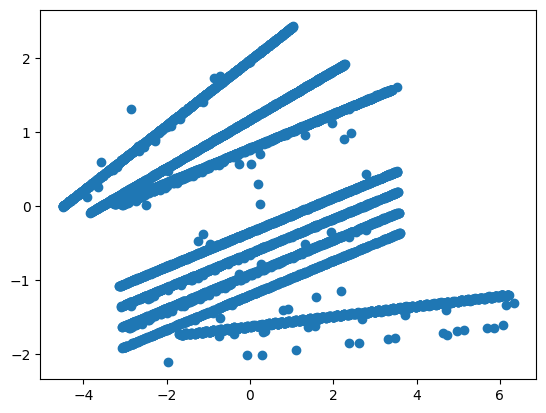

In [97]:
plt.scatter(pca_test['pca_component_1'], pca_test['pca_component_2'])

# **K-Means**
데이터를 K개의 군집으로 묶는 알고리즘

In [101]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
kmeans = KMeans(n_clusters = k)

# 정규화된 데이터에 학습
kmeans.fit(pca_train)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_train['kmeans'] = kmeans.fit_predict(pca_train)

pca_train.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pca_component_1,pca_component_2,kmeans
0,-1.809240,-0.747678,1
1,2.166630,-1.395636,0
2,-0.877725,-0.900724,0
3,0.436667,-1.113738,0
4,-0.895751,-0.898928,0


In [102]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
kmeans = KMeans(n_clusters = k)

# 정규화된 데이터에 학습
kmeans.fit(pca_test)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_test['kmeans'] = kmeans.fit_predict(pca_test)

pca_test.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pca_component_1,pca_component_2,kmeans
0,0.876501,0.985500,2
1,1.321688,1.086761,2
2,-1.504227,0.431423,1
3,-0.053620,0.767130,2
4,-0.480818,0.670873,2


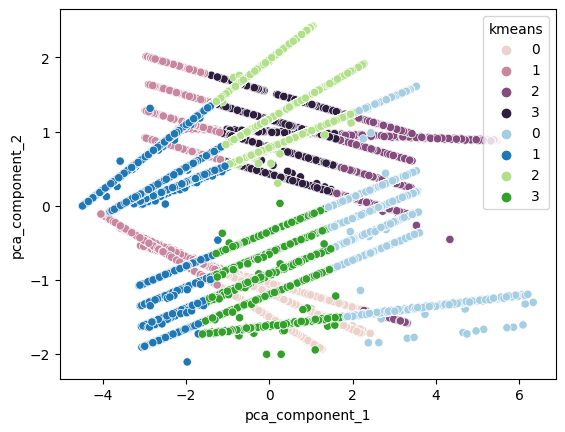

In [103]:
axs = plt.subplots()
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='kmeans', data=pca_train)
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='kmeans', data=pca_test,  palette='Paired')

# **GMM (Gaussian Mixture Model)**
Gaussian 분포가 여러 개 혼합된 분포의 알고리즘

In [104]:
#train

from sklearn.mixture import GaussianMixture

# 그룹 수, random_state 설정
gmm = GaussianMixture(n_components=1, random_state=0)

# 정규화된 데이터에 학습
gmm.fit_predict(pca_train)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_train['gmm'] = gmm.fit_predict(pca_train)
pca_train.head()

,pca_component_1,pca_component_2,kmeans,gmm
0,-1.809240,-0.747678,1,0
1,2.166630,-1.395636,0,0
2,-0.877725,-0.900724,0,0
3,0.436667,-1.113738,0,0
4,-0.895751,-0.898928,0,0


In [105]:
#test

from sklearn.mixture import GaussianMixture

# 그룹 수, random_state 설정
gmm = GaussianMixture(n_components=1, random_state=0)

# 정규화된 데이터에 학습
gmm.fit_predict(pca_test)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_test['gmm'] = gmm.fit_predict(pca_test)

pca_test.head()

,pca_component_1,pca_component_2,kmeans,gmm
0,0.876501,0.985500,2,0
1,1.321688,1.086761,2,0
2,-1.504227,0.431423,1,0
3,-0.053620,0.767130,2,0
4,-0.480818,0.670873,2,0


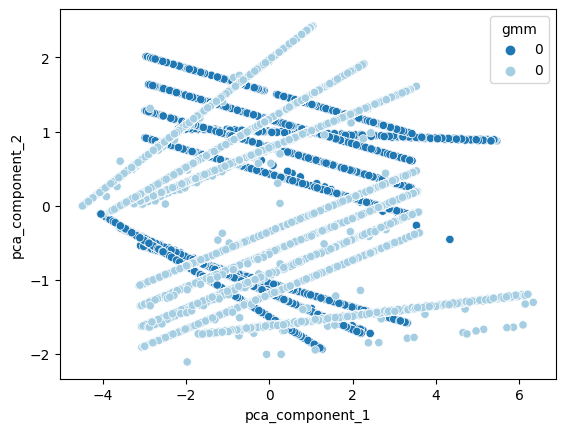

In [106]:
axs = plt.subplots()
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='gmm', data=pca_train)
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='gmm', data=pca_test,  palette='Paired')

# **DBSCAN**
특정 공간 내에 데이터 밀도 차이를 기반으로  군집을 생성하는 알고리즘

In [107]:
#train

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# 그룹 수, random_state 설정
dbscan = DBSCAN(eps=0.6, min_samples=5, metric='euclidean')

# 정규화된 데이터에 학습
dbscan.fit_predict(pca_train)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_train['dbscan'] = dbscan.fit_predict(pca_train)

pca_train.head()

,pca_component_1,pca_component_2,kmeans,gmm,dbscan
0,-1.809240,-0.747678,1,0,0
1,2.166630,-1.395636,0,0,1
2,-0.877725,-0.900724,0,0,1
3,0.436667,-1.113738,0,0,1
4,-0.895751,-0.898928,0,0,1


In [108]:
#test

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# 그룹 수, random_state 설정
dbscan = DBSCAN(eps=0.6, min_samples=5, metric='euclidean')

# 정규화된 데이터에 학습
dbscan.fit_predict(pca_test)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_test['dbscan'] = dbscan.fit_predict(pca_test)

pca_test.head()

,pca_component_1,pca_component_2,kmeans,gmm,dbscan
0,0.876501,0.985500,2,0,0
1,1.321688,1.086761,2,0,0
2,-1.504227,0.431423,1,0,1
3,-0.053620,0.767130,2,0,0
4,-0.480818,0.670873,2,0,0


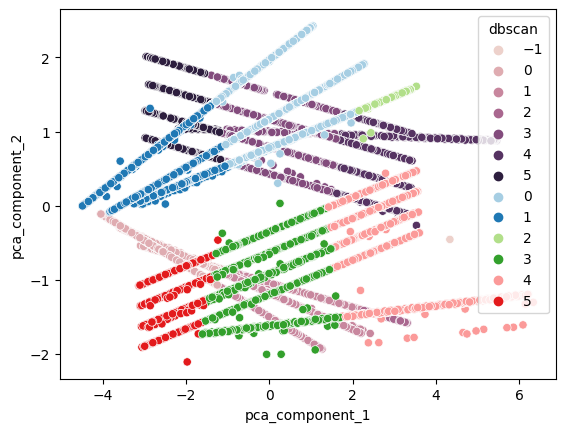

In [109]:
axs = plt.subplots()
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='dbscan', data=pca_train)
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='dbscan', data=pca_test,  palette='Paired')

# **Mean Shift**
개별 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행하는 알고리즘

In [110]:
#train

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 최적의 대역폭 반환
bandwidth = estimate_bandwidth(pca_train)
print('bandwidth 값:', round(bandwidth,3))

# 그룹 수, random_state 설정
meanshift = MeanShift(bandwidth = bandwidth)

# 정규화된 데이터에 학습
meanshift.fit_predict(pca_train)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_train['meanshift'] = meanshift.fit_predict(pca_train)

pca_train.head()

bandwidth 값: 3.103


,pca_component_1,pca_component_2,kmeans,gmm,dbscan,meanshift
0,-1.809240,-0.747678,1,0,0,0
1,2.166630,-1.395636,0,0,1,0
2,-0.877725,-0.900724,0,0,1,0
3,0.436667,-1.113738,0,0,1,0
4,-0.895751,-0.898928,0,0,1,0


In [111]:
#test

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 최적의 대역폭 반환
bandwidth = estimate_bandwidth(pca_test)
print('bandwidth 값:', round(bandwidth,3))

# 그룹 수, random_state 설정
meanshift = MeanShift(bandwidth = bandwidth)

# 정규화된 데이터에 학습
meanshift.fit_predict(pca_test)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_test['meanshift'] = meanshift.fit_predict(pca_test)

pca_test.head()

bandwidth 값: 3.512


,pca_component_1,pca_component_2,kmeans,gmm,dbscan,meanshift
0,0.876501,0.985500,2,0,0,0
1,1.321688,1.086761,2,0,0,0
2,-1.504227,0.431423,1,0,1,0
3,-0.053620,0.767130,2,0,0,0
4,-0.480818,0.670873,2,0,0,0


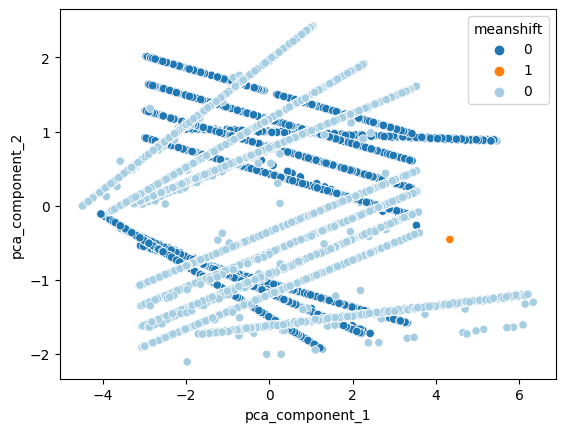

In [112]:
axs = plt.subplots()
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='meanshift', data=pca_train)
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='meanshift', data=pca_test,  palette='Paired')

# **Hierarchical Clustering (계층적 군집화)**
여러개의 군집 중에서 가장 유사도가 높은 혹은 거리가 가까운 군집 두 개를 선택하여 하나로 합치면서 군집 개수를 줄여 가는 알고리즘

In [113]:
#train

from sklearn.cluster import AgglomerativeClustering

# 그룹 수, random_state 설정
hierachical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# 정규화된 데이터에 학습
hierachical.fit_predict(pca_train)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_train['hierachical'] = hierachical.fit_predict(pca_train)

pca_train.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,pca_component_1,pca_component_2,kmeans,gmm,dbscan,meanshift,hierachical
0,-1.809240,-0.747678,1,0,0,0,3
1,2.166630,-1.395636,0,0,1,0,1
2,-0.877725,-0.900724,0,0,1,0,1
3,0.436667,-1.113738,0,0,1,0,1
4,-0.895751,-0.898928,0,0,1,0,1


In [114]:
#test

from sklearn.cluster import AgglomerativeClustering

# 그룹 수, random_state 설정
hierachical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# 정규화된 데이터에 학습
hierachical.fit_predict(pca_test)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pca_test['hierachical'] = hierachical.fit_predict(pca_test)

pca_test.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,pca_component_1,pca_component_2,kmeans,gmm,dbscan,meanshift,hierachical
0,0.876501,0.985500,2,0,0,0,1
1,1.321688,1.086761,2,0,0,0,1
2,-1.504227,0.431423,1,0,1,0,3
3,-0.053620,0.767130,2,0,0,0,1
4,-0.480818,0.670873,2,0,0,0,1


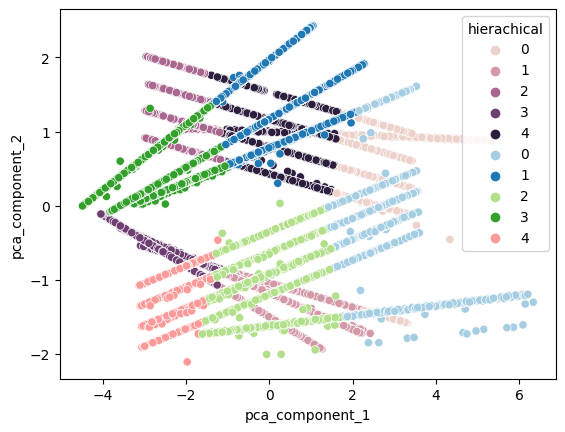

In [115]:
axs = plt.subplots()
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='hierachical', data=pca_train)
axs = sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='hierachical', data=pca_test,  palette='Paired')